# Data Analysis - Fashion Transparency Index 2025 
### Data from: Wikirate.org, 'Fashion Transparency Index 2025' by Fashion Revolution, licensed under CC BY 4.0


## Libraries and Imports: 

In [1]:
import pandas as pd

## Data Collection and Loading: 

In [2]:
# The first 4 lines are comments on the dataset, so skiprows accesses the actual data that start after these comments
df = pd.read_csv("../Wikirate-2025_10_21_153411-Fashion_Transparency_Index_2025+Answer.csv", skiprows=4)

## Raw Exploratory Data Analysis (EDA):

In [3]:
print(df.shape)

(200, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Answer Page  200 non-null    object 
 1   Metric       200 non-null    object 
 2   Company      200 non-null    object 
 3   Year         200 non-null    int64  
 4   Value        200 non-null    float64
 5   Source Page  0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.5+ KB


In [5]:
df.head()

,Answer Page,Metric,Company,Year,Value,Source Page
0,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Primark,2025,1.499927,NaN
1,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Gap inc.,2025,2.300026,NaN
2,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Levi Strauss & Co.,2025,2.633291,NaN
3,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,H&M,2025,7.116664,NaN
4,https://wikirate.org/Fashion_Revolution+Fashio...,Fashion Revolution+Fashion Transparency Index ...,Nike Inc.,2025,2.733265,NaN


## Data Preprocessing

In [6]:
df = df.drop(columns=['Answer Page', 'Metric', 'Year', 'Source Page'])
df = df.rename(columns={"Value": "Transparency_Score"})
df.head()

,Company,Transparency_Score
0,Primark,1.499927
1,Gap inc.,2.300026
2,Levi Strauss & Co.,2.633291
3,H&M,7.116664
4,Nike Inc.,2.733265


In [7]:
df.describe()

,Transparency_Score
count,200.000000
mean,1.399742
std,1.371766
min,0.000000
25%,0.349954
50%,1.116560
75%,2.066514
max,7.116664


In [8]:
df.sort_values("Transparency_Score", ascending=False).head(10)

,Company,Transparency_Score
3,H&M,7.116664
134,Calzedonia,6.250535
144,Intimissimi S.p.A,6.250535
157,Tezenis,6.250535
17,Puma,5.066524
155,OVS SpA,4.933321
16,Gucci,4.666782
43,Gildan Activewear Inc.,4.633400
66,lululemon athletica,3.933430
46,Asics Corporation,3.766937


In [9]:
df.sort_values("Transparency_Score", ascending=True).head(10)

,Company,Transparency_Score
99,LC Waikiki,0.0
53,Urban Outfitters,0.0
124,Eddie Bauer,0.0
123,Bosideng International Holdings Limited,0.0
111,Semir,0.0
110,LL Bean,0.0
108,Ted Baker,0.0
29,Belle International Holdings,0.0
107,Hudson's Bay Company,0.0
106,Forever 21,0.0


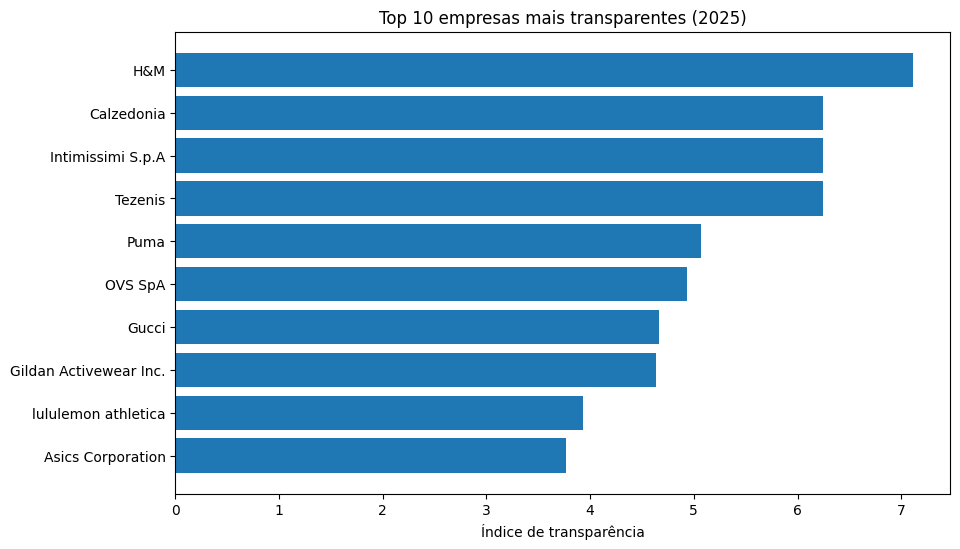

In [10]:
import matplotlib.pyplot as plt

top10 = df.sort_values("Transparency_Score", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top10["Company"], top10["Transparency_Score"])
plt.gca().invert_yaxis()
plt.title("Top 10 empresas mais transparentes (2025)")
plt.xlabel("Índice de transparência")
plt.show()

## Feature Engineering: 

In [93]:
# Here I'm creating categories to compare how different types of products (luxury, fast fashion, etc) relate to the 
# transparency values in the dataset.
def categorize(company):
    company_name = str(company).lower().strip()
    
    fast_fashion = ["primark", "gap", "h&m", "c&a", "uniqlo", "marks and spencer", "zara", "target", "carter's", "joe fresh", "falabella", "next", "sainsbury's", "kohl's", "ross stores", "abercrombie", "macy's", "truworths", "fossil", "urban outfitters", "american eagle", "guess", "quiksilver", "mango", "dkny", "new look", "cortefiel", "aeropostale", "heilan home", "express", "burlington", "chico's", "children's", "el corte ingles", "buckle", "takko holding", "target australia", "river island", "lc waikiki", "cotton on", "oliver", "kmart", "forever 21", "semir", "boohoo.com", "steve madden", "new yorker", "kiabi", "massimo dutti", "vero moda", "jack & jones", "old navy", "banana republic", "hollister", "pull & bear", "prettylittlething", "tezenis", "stradivarius", "bonprix", "george (brand)", "f&f", "smart bazaar", "dressmann", "tj maxx", "big w", "nine west", "revolve", "deichmann", "gu", "shein", "reliance trends", "ajio", "splash", "shimamura", "max fashion", "fashion nova", "bershka"]
    luxury = ["valentino", "louis vuitton", "burberry", "gucci", "hermes", "christian dior", "prada", "moncler", "giorgio armani", "fendi", "marc jacobs", "ralph lauren", "salvatore ferragamo", "chanel", "miu miu", "capri holdings", "tod", "brunello cucinelli", "chloe", "saint laurent", "bottega veneta", "balenciaga", "dolce & gabbana", "versace", "max mara", "ermenegildo zegna", "marni", "celine", "fifth avenue", "jil sander", "carolina herrera", "tory burch", "bcbgmaxazria"]
    sports_wear = ["nike", "adidas", "converse", "puma", "the north face", "sporting good", "new balance", "foot locker", "gildan", "under armour", "asics", "skechers", "lululemon", "brooks", "asos", "rei", "mizuno", "billabong", "decathlon", "jd sports", "vans", "anta", "reebok", "fila", "russel", "jordan", "roxy", "famous footwear", "fanatics", "champion", "sports direct", "columbia"]
    
    if any(x in company_name for x in sports_wear):
        return "Sportswear"
    elif any(x in company_name for x in luxury):
        return "Luxury"
    elif any(x in company_name for x in fast_fashion):
        return "Fast Fashion"
    else:
        return "Mid-Market/Others"

df["Market_Segment"] = df["Company"].apply(categorize) 

## Exploratory Data Analysis (EDA)

In [95]:
print(df['Market_Segment'].value_counts())

df_segment_scores = df.groupby('Market_Segment')['Transparency_Score'].mean().sort_values(ascending=False).reset_index()

print("\nMédia de Score de Transparência por Segmento de Mercado:")
print(df_segment_scores)

Market_Segment
Fast Fashion         77
Mid-Market/Others    58
Luxury               33
Sportswear           32
Name: count, dtype: int64

Média de Score de Transparência por Segmento de Mercado:
      Market_Segment  Transparency_Score
0         Sportswear            1.753154
1             Luxury            1.517084
2       Fast Fashion            1.317740
3  Mid-Market/Others            1.246859


In [96]:
df_segment_scores = df.groupby('Market_Segment')['Transparency_Score'].mean().sort_values(ascending=False).reset_index()

df_segment_scores['Transparency_Score'] = df_segment_scores['Transparency_Score'].round(2)

print(df_segment_scores)

      Market_Segment  Transparency_Score
0         Sportswear                1.75
1             Luxury                1.52
2       Fast Fashion                1.32
3  Mid-Market/Others                1.25


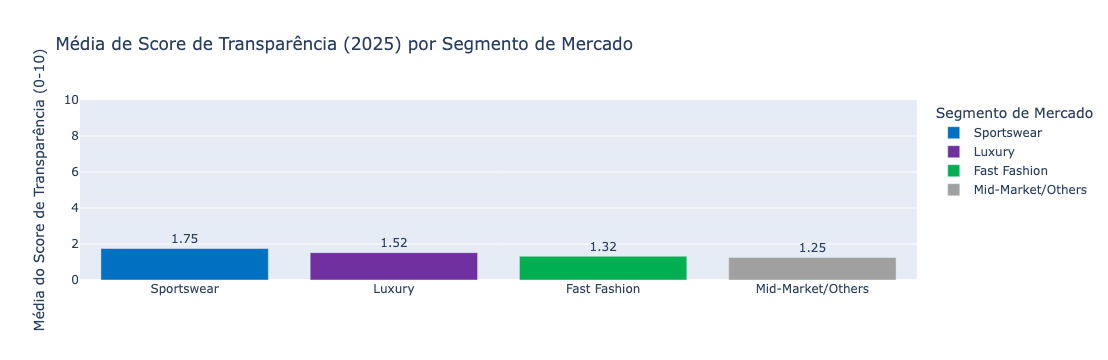

In [97]:
import plotly.express as px

# Color pallete
color_map = {
    'Fast Fashion': '#00B050',  # Verde
    'Sportswear': '#0070C0',    # Azul
    'Luxury': '#7030A0',        # Roxo
    'Mid-Market/Others': '#A0A0A0' # Cinza (Baseline/Others)
}

fig = px.bar(
    df_segment_scores, 
    x='Market_Segment',
    y='Transparency_Score',
    color='Market_Segment', 
    color_discrete_map=color_map,
    
    # Graphic's labels
    title='Média de Score de Transparência (2025) por Segmento de Mercado',
    labels={'Transparency_Score': 'Média do Score de Transparência (0-10)', 'Market_Segment': 'Segmento de Mercado'},
    
    # Hover bar
    hover_data={'Transparency_Score': ':.2f'},
    
    range_y=[0, 10] 
)

# Adding values on top of each bar
fig.update_traces(texttemplate='%{y:.2f}', textposition='outside')

# Improve Layout
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide', xaxis_title=None)

fig.show()

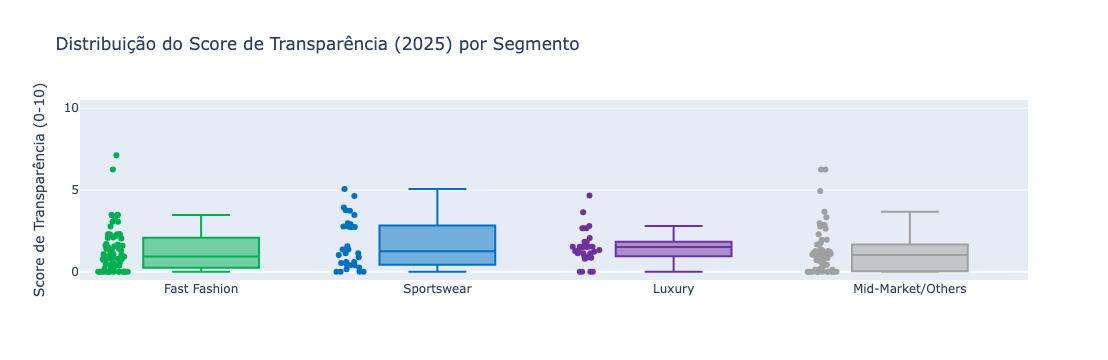

In [98]:
import plotly.express as px
import pandas as pd

segment_order = ['Fast Fashion', 'Sportswear', 'Luxury', 'Mid-Market/Others']

color_map = {
    'Fast Fashion': '#00B050',
    'Sportswear': '#0070C0',
    'Luxury': '#7030A0',
    'Mid-Market/Others': '#A0A0A0'
}

fig = px.box(
    df,
    x='Market_Segment',
    y='Transparency_Score',
    color='Market_Segment',
    category_orders={'Market_Segment': segment_order},
    color_discrete_map=color_map,
    
    title='Distribuição do Score de Transparência (2025) por Segmento',
    labels={'Transparency_Score': 'Score de Transparência (0-10)', 'Market_Segment': 'Segmento de Mercado'},
    
    range_y=[-0.5, 10.5],
    
    points="all" 
)

fig.update_layout(
    xaxis_title=None,
    showlegend=False
)

fig.show()

In [99]:
df_bottom_20 = df.sort_values(by='Transparency_Score', ascending=True)

df_bottom_20 = df_bottom_20.head(20).reset_index(drop=True)

df_bottom_20 = df_bottom_20[['Company', 'Market_Segment', 'Transparency_Score']]

df_bottom_20['Bottom_Rank'] = df_bottom_20.index + 1

print("--- Less Transparent Companies (2025) ---")
print(df_bottom_20)

--- Less Transparent Companies (2025) ---
                                    Company     Market_Segment  \
0                                LC Waikiki       Fast Fashion   
1                          Urban Outfitters       Fast Fashion   
2                               Eddie Bauer  Mid-Market/Others   
3   Bosideng International Holdings Limited  Mid-Market/Others   
4                                     Semir       Fast Fashion   
5                                   LL Bean  Mid-Market/Others   
6                                 Ted Baker  Mid-Market/Others   
7              Belle International Holdings  Mid-Market/Others   
8                      Hudson's Bay Company  Mid-Market/Others   
9                                Forever 21       Fast Fashion   
10                               Buckle Inc       Fast Fashion   
11                          Chico's FAS Inc       Fast Fashion   
12                              Express Inc       Fast Fashion   
13                              He